# A fast and robust statistical tool for simple number counting with uncertainty

Kyle Cranmer, June 18, 2015

[![](https://i.creativecommons.org/l/by/4.0/88x31.png)]( https://creativecommons.org/licenses/by/4.0/)

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#Introduction

We consider the case of a simple number counting analysis with uncertainty on the background expectation.

First, let us consider the main number counting measurement.

The statistical model is: 


\begin{equation}
P(n|\nu_s, \nu_b) = Pois(n | \nu_s + \nu_b)
\end{equation}

where
  * $n$ is the observed number of events satisfying the selection
  * $\nu_s$ is the expected signal (the parameter of interest)
  * $\nu_b$ is the expected background (fixed now, but later a nuisance parameter)
  
*(Note, I'm using greek letters for parameters instead of $Pois(n|s+b)$)*



If the background were known exactly, then $\nu_b$ would be fixed. 

But if we have background uncertainty, then $\nu_b$ is a nuisance parameter that can float in a fit.

At this point, there is nothing indicating that we have some best guess for the background and uncertainty on that estimate.


# An intuitive way to add background uncertainty to the model

Let's say that we have some estimate for the background, something like $100 \pm 7$ events.
How do we incorporate that into the statistical model.  Instead of $100 \pm 7$, let's write $\nu_b^{exp} \pm \Delta_b$

A common and intuitive approach is that one would randomize the background expectation $\nu_b$ in the process of "generating toy Monte Carlo" to calculate p-values. 

In general, using Monte Carlo from to sample from a distribution can be seen as a form of integrtion. So if you were to randomly draw $\nu_b$ from a Gaussian centered at $\nu_b^{exp}$ with standard deviation of $\Delta$, that corresonds to the distribution $Gaus(\nu_b | \nu_b^{exp}, \Delta_b)$.  

Thus, the distribution of $n$ would be equivalent to

\begin{equation}
\\
P(n \,|\,\nu_s) = \int  Pois(n | \nu_s + \nu_b) \, Gaus(\nu_b | \nu_b^{exp}, \Delta_b) \, d\nu_b
\end{equation}

Did you notice that this is a Bayesian procedure?  If we were to calculate p-values, it would be a hybrid Bayesian-Frequentist procedure (sometimes referred to as the Cousins-Highland method).

You can spot that it is Bayesain easily because we used greek letters for the parameters. Whenever you see a distribution for a parameter -- eg. $Gaus(\nu_b | \nu_b^{exp}, \Delta_b)$ -- then it is Bayesian.  

Similarly, whenever you see integration with respect to a parameter (or Monte Carlo sampling of a parameter), then it is Bayesian.

# So what if it is Bayesian, it is based on a measurement.

Often the background estimate is based on a measurement. 

So while the distribution $Gaus(\nu_b | \nu_b^{exp}, \Delta_b)$ is considered a prior for this statistical model, it is not a completely subjective prior.

That's true, it's better to think of it as a posterior from some other measurement. 

So what is that other auxiliary measurement?
   * Let's call it $m$
   * so our example $Gaus(\nu_b | \nu_b^{exp}, \Delta_b)$ can be written schematically $\pi(\nu_b | m)$.

And remember Bayes theorem, the posterior is given by:

\begin{equation}
\underbrace{\pi(\nu_b | m)}_{posterior} = \underbrace{N}_{normalizaton} \,\,\, \underbrace{p(m|\nu_b)}_{likelihood} \,\,\, \underbrace{\eta(\nu_b )}_{original\, prior}
\end{equation}

The "problem", if you will, is that while the likelihood function for the measurement is based on physics considerations, the original prior $\eta(\nu_b)$ is more subjective. One can hope that the likelihood dominates the prior, but there is no escaping the presence of some original prior that is not based on an auxiliary experiment.

#So what how would you deal with this in a frequentist way?

This problem is now quite well studied, and a good prototype for dealing with nuisance parameters in a frequentist way. 

The problem is sometimes called the on/off problem (from it's background in astronomy) or the "prototype problem" in some PhyStat literature.

As in all of our statistical problems (whether you are Bayesian or frequentist), the first step is to write down the full statistical model. In this case it involves to parts:
   * the main measurement (the "on" source part) $Pois(n| \nu_s + \nu_b)$
   * the auxiliary measurement (the "off" source part) $p(m | \nu_b)$
   
The total model is just the product of the two (assuming that the main and auxiliary measurements are statistically independent -- i.e. they have non-overlapping selection, are disjoint, or "orthogonal")
\begin{equation}
  P(n,m | \nu_s, \nu_b) = Pois(n| \nu_s + \nu_b) \, p(m | \nu_b)
\end{equation}

Now maybe we should think harder about that auxiliary measurement.
   * maybe we only have an best fit value and uncertainty $\nu_b^{best fit} \pm \Delta_b$, then a Gaussian is not a bad choice if $\Delta_b \ll \nu_b^{best fit}$,
   * or maybe it was also a number counting experiment $p(m|\nu_b) = Pois(m|\nu_b)$
   
In what follows, I will assume that the auxiliary measurement is also based on number counting. 


# The profile likelihood for this problem

# Demo

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import FastAsimovUtils as fau

In [5]:
fau.bhat(100,50,1)

50.0

In [6]:
fau.ExpectedSignificance(20.9,100,.1)

2.0227824543154633

In [7]:
fau.ExpectedLimit(100,.1)

20.90136514758641

In [8]:
s = np.linspace(0,150)

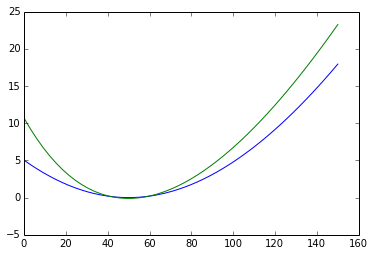

In [9]:
bhathat = s.copy() 
expSig = s.copy() 
logL = s.copy()
logLambda = s.copy()
for i, ss in enumerate(s):
    bhathat[i] = fau.bhathat(150,100,ss,1)
    expSig[i] = fau.ExpectedSignificance(ss,100,.1)
    logL[i] = fau.logL(150,100,ss,bhathat[i],1)+1000-37
    logL[i] = fau.logL(150,100,ss,100,1)+1000-38
    logLambda[i] = fau.logLambda(150,100,ss,1)
plt.plot(s,logLambda)    
plt.plot(s,logL)    

In [10]:
qmuBand__1 = s.copy()
qmuBand_0 = s.copy()
qmuBand_1 = s.copy()

for i, ss in enumerate(s):
    qmuBand__1[i] = fau.qmuBand(ss, 100., 1., -1.) 
    qmuBand_0[i] = fau.qmuBand(ss, 100., 1., 0.) 
    qmuBand_1[i] = fau.qmuBand(ss, 100., 1., 1.) 

plt.plot(s,qmuBand__1)
plt.plot(s,qmuBand_0)
plt.plot(s,qmuBand_1)

qmu is a delta function when mu=0
qmu is a delta function when mu=0


ZeroDivisionError: float division by zero

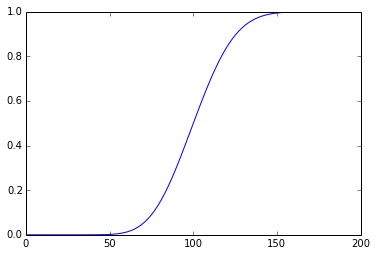

In [11]:
sig =1.
muTest=10.
qmuMax = 2*(muTest/sig)**2
qmuTest = np.linspace(0,qmuMax,100)
F = qmuTest.copy()
for i,qq in enumerate(qmuTest):
    F[i]=fau.F(qq,muTest,0.,sig)
plt.plot(qmuTest,F)

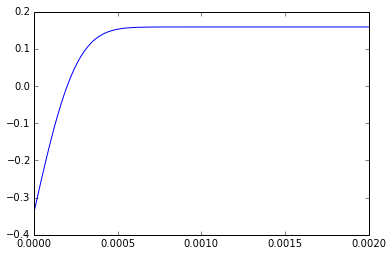

In [12]:
qmuTest = np.linspace(0,.002,100)

CLb = qmuTest.copy()
for i,qq in enumerate(qmuTest):
    CLb[i] = fau.CLbArgumentWrapper(qq, 0.001, 100, 10000.0, 100.0, -1.0)
    #CLb[i] = fau.F(float(qq),float(30.),float(0),float(sig))
plt.plot(qmuTest,CLb)

In [13]:
fau.F(0,float(10.),float(0),float(20.))

0.30853753872598688

In [14]:
CLsArgumentWrapper_qmu(s, bExp, deltaB, sigmaBand))

SyntaxError: invalid syntax (<ipython-input-14-0abf6dfa6c00>, line 1)

In [15]:
fau.ExpectedLimit(bExp=100,deltaB=1)

20.986691363680734

In [16]:
fau.ExpectedLimitBand(bExp=100,deltaB=1,sigmaBand=0)

20.98669136368375

In [17]:
fau.ExpectedLimitBand(bExp=100,deltaB=1,sigmaBand=-1)

14.856447563174335

In [18]:
fau.ExpectedLimitBand(bExp=100,deltaB=1,sigmaBand=1)

29.91982231374918

In [19]:
fau.ExpectedLimitBand(bExp=100,deltaB=1,sigmaBand=+1)

29.91982231374918

In [20]:
fau.CLbArgumentWrapper (30,0.001, 100, 10000.0, 100.0, -1.0)

0.15865525393145707

In [21]:
from scipy.stats import norm
norm.cdf(-1)

0.15865525393145707

In [22]:
fau.ObsExpAndBands_Limits(110,100,10)

hit boundary


(38.591153241789826,
 14.894696739995425,
 20.018156448334437,
 27.8500274159808,
 38.92092078534034,
 52.54267178906887)

In [23]:
fau.ObsExpAndBands_Limits(0,1,.2)


	brentq failed (boundaries?) using a simple scan

	CLsArgumentWrapper_qmu (0.001, 1, 0.2, 1.0)

	Approximate  1.0  95% CLs upper-limit =  0.001

	brentq failed (boundaries?) using a simple scan

	CLsArgumentWrapper_qmu (0.001, 1, 0.2, 2.0)

	Approximate  2.0  95% CLs upper-limit =  0.001


FastAsimovUtils.py:62: RuntimeWarning: divide by zero encountered in log
  return (s+b) - n * log(s+b) + (tau*b) - m * log(tau*b)
FastAsimovUtils.py:62: RuntimeWarning: invalid value encountered in double_scalars
  return (s+b) - n * log(s+b) + (tau*b) - m * log(tau*b)
FastAsimovUtils.py:82: RuntimeWarning: divide by zero encountered in double_scalars
  return 1./sqrt(fisher)


(1.6370904631912709e-12,
 1.4602633450097817,
 2.154972646228652,
 3.418159028695187,
 0.001,
 0.001)

In [24]:
fau.ObservedSignificance(150,100,.1)

21.6370327175 10000.0


4.6515623953104566

In [27]:
fau.ExpectedSignificance(12,16,4.)

1.8205921525571356

In [28]:
fau.ExpectedSignificance(300,900,30)

6.5577525578348173

In [32]:
2*fau.logLambda(12+16,16,0,1)

3.3145557859525923

In [33]:
sqrt(2*fau.logLambda(12+16,16,0,1))

1.8205921525571267

In [34]:
2*fau.logLambda(n=12+16,m=16,s=0,tau=1)

3.3145557859525923

In [35]:
2*fau.logLambda(n=300+900,m=900,s=0,tau=1)

43.004118609787838

In [36]:
sqrt(2*fau.logLambda(n=300+900,m=900,s=0,tau=1))

6.5577525578347222